LRCN

In [1]:
import tensorflow as tf
import utilities as ut
import importlib
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.models import Sequential
from keras_preprocessing.image import array_to_img, img_to_array, load_img
from gen import FrameGenerator
import os
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
import pandas as pd
import cv2 
import numpy as np

In [2]:
CLASSES_LIST = ["Fight","NonFight"]
batch_size = 8
SIZE = (299,299)
INP_SHAPE = (299,299,3)
SEQUENCE_LENGTH = 20
LR = 0.0001
MOMENTUM = 0.5
STRIDE = 5

## Creating Image Generator

In [3]:
path = os.path.join("RWF-2000 Sequences","data_files")
#x = gen.load_samples(path=path)
#x = pd.DataFrame(x)
params = {
    'batch_size':batch_size,
    'target_size':(299,299),
    'temporal_stride': STRIDE,
    'temporal_length': SEQUENCE_LENGTH,
    'n_classes':2, 
    'is_autoencoder':False,
    'shuffle':True }
train_gen = FrameGenerator(path,**params)
params = {
    'temporal_stride': STRIDE,
    'temporal_length': SEQUENCE_LENGTH,
    'label': 'val',
    'target_size':(299,299),
    'n_classes':2, 
    'is_autoencoder':False,
    'shuffle':False }
    
valid_gen = FrameGenerator(path,**params)

Found 4800 videos belonging to 2 classes.
Found 1200 videos belonging to 2 classes.


## Set callbacks

In [3]:
base_model_1 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=INP_SHAPE)
for layer in base_model_1.layers[:-4]:                                                       
    layer.trainable = False
#base_model_1.summary()
model_1 = Sequential()
model_1.add(TimeDistributed(base_model_1, input_shape=(SEQUENCE_LENGTH,299,299,3)))
model_1.add(TimeDistributed(Flatten()))
model_1.add(LSTM (256, activation='tanh', return_sequences=False))
model_1.add(Dense(64,activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(2,activation='softmax'))
#model_1.summary()
model_1.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr = LR, momentum= MOMENTUM),metrics=['accuracy'])
#history = model_1.fit(train_gen,batch_size=batch_size,validation_data=valid_gen,epochs=10,verbose=1)

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


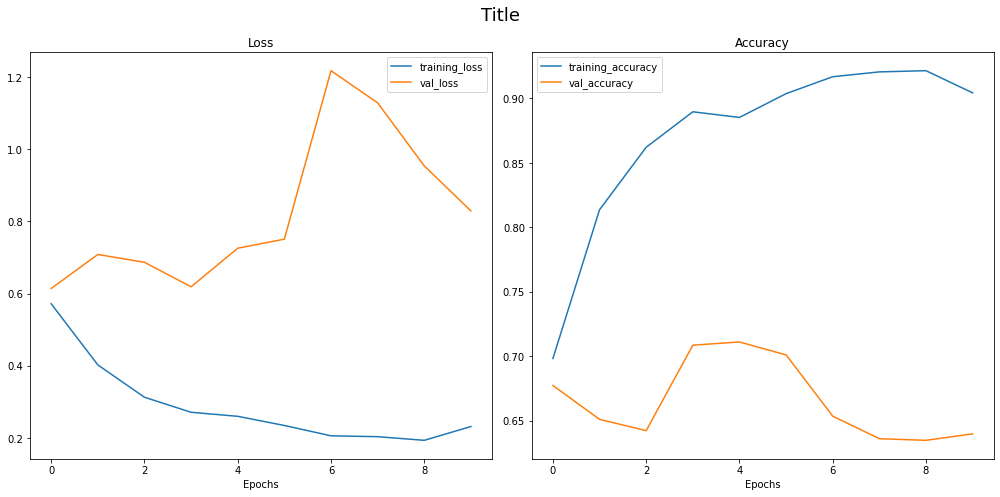

In [11]:
ut.Visualize.plot_loss_curves([history],['Title'])

In [5]:
base_model_2 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=INP_SHAPE)
for layer in base_model_2.layers[:-4]:                                                       
    layer.trainable = False
#base_model_2.summary()
model_2 = Sequential()
model_2.add(TimeDistributed(base_model_2, input_shape=(SEQUENCE_LENGTH,299,299,3)))
model_2.add(TimeDistributed(Flatten()))
model_2.add(LSTM (256, activation='tanh', return_sequences=False))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(2,activation='softmax'))
model_2.summary()
model_2.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.01, momentum= 0.5),metrics=['accuracy'])
history_2 = model_2.fit(train_gen,batch_size=8,validation_data=valid_gen,callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=2)],epochs=10,verbose=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 20, 8, 8, 2048)   21802784  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 20, 131072)       0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               134480896 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
400/400 [==============================] - 552s 1s/step - loss: 0.5890 - accuracy: 0.6819 - val_loss: 0.5840 - val_accuracy: 0.6925
Epoch 2/10
400/400 [==============================] - 537s 1s/step - loss: 0.4354 - accuracy: 0.7969 - val_loss: 0.6138 - val_accuracy: 0.6938
Epoch 3/10
400/400 [==============================] - 544s 1s/step - loss: 0.3705 - accuracy: 0.8338 - val_loss: 0.9045 - val_accuracy: 0.5962
Epoch 4/10
400/400 [==============================] - 525s 1s/step - loss: 0.3187 - accuracy: 0.8641 - val_loss: 0.6827 - val_accuracy: 0.6913
Epoch 5/10
400/400 [==============================] - 520s 1s/step - loss: 0.3210 - accuracy: 0.8572 - val_loss: 0.7697 - val_accuracy: 0.6338
Epoch 6/10
400/400 [==============================] - 522s 1s/step - loss: 0.2795 - accuracy: 0.8809 - val_loss: 1.3162 - val_accuracy: 0.5888
Epoch 7/10
400/400 [==============================] - 523s 1s/step - loss: 0.2804 - accuracy: 0.8809 - val_loss: 0.7275 - val_accuracy: 0.6612

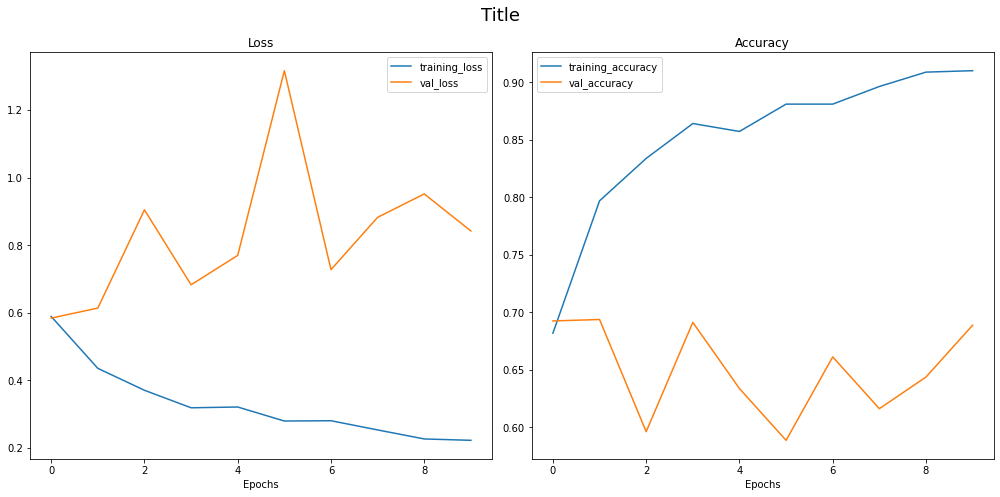

In [6]:
ut.Visualize.plot_loss_curves([history_2],['Title'])

In [4]:
base_model_3 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=INP_SHAPE)
for layer in base_model_3.layers[:-4]:                                                       
    layer.trainable = False
#base_model_3.summary()
model_3 = Sequential()
model_3.add(TimeDistributed(base_model_3, input_shape=(SEQUENCE_LENGTH,299,299,3)))
model_3.add(TimeDistributed(Flatten()))
model_3.add(LSTM (256, activation='tanh', return_sequences=False))
model_3.add(Dense(64,activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(2,activation='softmax'))
model_3.summary()
model_3.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.01, momentum= 0.5),metrics=['accuracy'])
history_3 = model_3.fit(train_gen,batch_size=8,validation_data=valid_gen,callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=2)],epochs=10,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 20, 8, 8, 2048)   21802784  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 20, 131072)       0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               134480896 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
400/400 [==============================] - 568s 1s/step - loss: nan - accuracy: 0.5025 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/10
400/400 [==============================] - 603s 2s/step - loss: nan - accuracy: 0.5009 - val_loss: nan - val_accuracy: 0.5000


In [1]:
base_model_4 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=INP_SHAPE)
for layer in base_model_4.layers[:-4]:                                                       
    layer.trainable = False
#base_model_4.summary()
model_4 = Sequential()
model_4.add(TimeDistributed(base_model_4, input_shape=(SEQUENCE_LENGTH,299,299,3)))
model_4.add(TimeDistributed(Flatten()))
model_4.add(LSTM (256, activation='tanh', return_sequences=True))
model_4.add(Flatten())
model_4.add(Dense(64,activation='relu'))
model_4.add(Dropout(0.25))
model_4.add(Dense(2,activation='softmax'))
#model_4.summary()
model_4.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.01, momentum= 0.5),metrics=['accuracy'])
history_4 = model_4.fit(train_gen,batch_size=8,validation_data=valid_gen,callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=2)],epochs=10,verbose=1)

NameError: name 'tf' is not defined

In [4]:
base_model_5 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=INP_SHAPE)
for layer in base_model_5.layers[:-4]:                                                       
    layer.trainable = False
#base_model_5.summary()
model_5 = Sequential()
model_5.add(TimeDistributed(base_model_5, input_shape=(SEQUENCE_LENGTH,299,299,3)))
model_5.add(TimeDistributed(Flatten()))
model_5.add(LSTM (256, activation='tanh', return_sequences=True))
model_5.add(Flatten())
model_5.add(Dense(64,activation='relu'))
model_5.add(Dropout(0.25))
model_5.add(Dense(2,activation='softmax'))
#model_5.summary()
model_5.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.01, momentum= 0.5),metrics=['accuracy'])
history_5 = model_5.fit(train_gen,batch_size=8,validation_data=valid_gen,callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=2)],epochs=10,verbose=1)

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
400/400 [==============================] - 721s 2s/step - loss: 0.6264 - accuracy: 0.6547 - val_loss: 0.6898 - val_accuracy: 0.5987
Epoch 2/10
400/400 [==============================] - 743s 2s/step - loss: 0.5014 - accuracy: 0.7641 - val_loss: 0.6372 - val_accuracy: 0.6938
Epoch 3/10
400/400 [==============================] - 744s 2s/step - loss: 0.3980 - accuracy: 0.8234 - val_loss: 0.6571 - val_accuracy: 0.7300
Epoch 4/10
400/400 [==============================] - 758s 2s/step - loss: 0.3195 - accuracy: 0.8681 - val_loss: 0.7354 - val_accuracy: 0.7150
Epoch 5/10
400/400 [==============================] - 773s 2s/step - loss: 0.2651 - accuracy: 0.8909 - val_loss: 0.7813 - val_accuracy: 0.7262
Epoch 6/10
  1/400 [..............................] - ETA: 8:59 - loss: 0.2079 - accuracy: 0.8750

KeyboardInterrupt: 

In [4]:
base_model_6 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=INP_SHAPE)
for layer in base_model_6.layers[:-4]:                                                       
    layer.trainable = False
#base_model_6.summary()
model_6 = Sequential()
model_6.add(TimeDistributed(base_model_6, input_shape=(SEQUENCE_LENGTH,299,299,3)))
model_6.add(TimeDistributed(Flatten()))
model_6.add(LSTM (256, activation='tanh', return_sequences=True))
model_6.add(Flatten())
model_6.add(Dense(64,activation='relu'))
model_6.add(Dropout(0.25))
model_6.add(Dense(2,activation='softmax'))
#model_6.summary()
model_6.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.01, momentum= 0.5),metrics=['accuracy'])
history_6 = model_6.fit(train_gen,batch_size=4,validation_data=valid_gen,callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=2)],epochs=3,verbose=1)

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/3
800/800 [==============================] - 856s 1s/step - loss: 0.6479 - accuracy: 0.6284 - val_loss: 0.6022 - val_accuracy: 0.7113
Epoch 2/3
800/800 [==============================] - 896s 1s/step - loss: 0.5096 - accuracy: 0.7534 - val_loss: 0.5861 - val_accuracy: 0.6988
Epoch 3/3
800/800 [==============================] - 890s 1s/step - loss: 0.4292 - accuracy: 0.7991 - val_loss: 0.5688 - val_accuracy: 0.6850


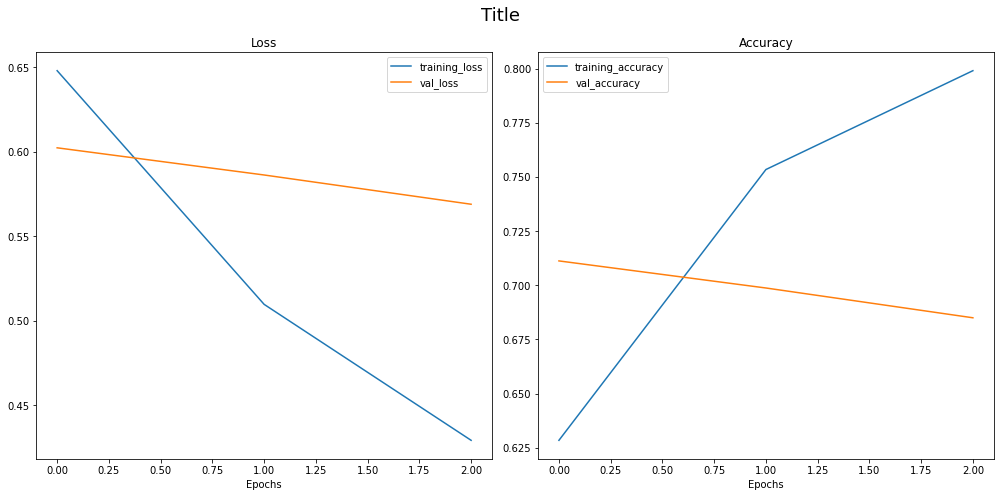

In [5]:
ut.Visualize.plot_loss_curves([history_6],['Title'])

In [4]:
base_model_7 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=INP_SHAPE)
for layer in base_model_7.layers[:-4]:                                                       
    layer.trainable = False
#base_model_7.summary()
model_7 = Sequential()
model_7.add(TimeDistributed(base_model_7, input_shape=(SEQUENCE_LENGTH,299,299,3)))
model_7.add(TimeDistributed(Flatten()))
model_7.add(LSTM (256, activation='tanh', return_sequences=True))
model_7.add(Flatten())
model_7.add(Dense(64,activation='relu'))
model_7.add(Dropout(0.25))
model_7.add(Dense(2,activation='softmax'))
#model_7.summary()
model_7.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.01, momentum= 0.5),metrics=['accuracy'])
history_7 = model_7.fit(train_gen,batch_size=8,validation_data=valid_gen,callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=2)],epochs=3,verbose=1)

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/3
400/400 [==============================] - 781s 2s/step - loss: 0.6016 - accuracy: 0.6812 - val_loss: 0.6058 - val_accuracy: 0.6825
Epoch 2/3
400/400 [==============================] - 814s 2s/step - loss: 0.4250 - accuracy: 0.8081 - val_loss: 0.6458 - val_accuracy: 0.6587
Epoch 3/3
400/400 [==============================] - 817s 2s/step - loss: 0.3561 - accuracy: 0.8462 - val_loss: 0.5749 - val_accuracy: 0.7163


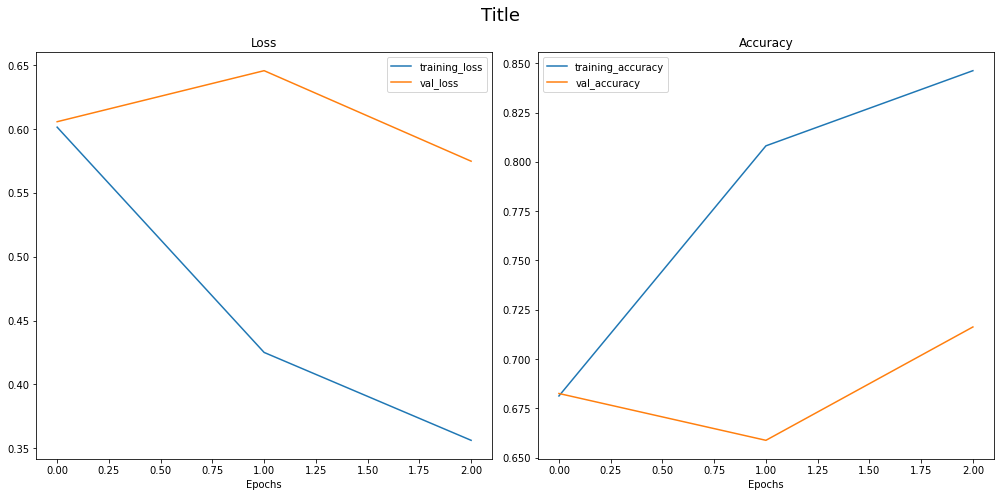

In [5]:
ut.Visualize.plot_loss_curves([history_7],['Title'])

In [4]:
base_model_8 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=INP_SHAPE)
for layer in base_model_8.layers[:-4]:                                                       
    layer.trainable = False
#base_model_8.summary()
model_8 = Sequential()
model_8.add(TimeDistributed(base_model_8, input_shape=(SEQUENCE_LENGTH,299,299,3)))
model_8.add(TimeDistributed(Flatten()))
model_8.add(LSTM (256, activation='tanh', return_sequences=True))
model_8.add(Flatten())
model_8.add(Dense(64,activation='relu'))
#model_8.add(Dropout(0.25))
model_8.add(Dense(2,activation='softmax'))
#model_8.summary()
model_8.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.01, momentum= 0.5),metrics=['accuracy'])
history_8 = model_8.fit(train_gen,batch_size=8,validation_data=valid_gen,callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=2)],epochs=3,verbose=1)

c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/3
400/400 [==============================] - 754s 2s/step - loss: 0.5969 - accuracy: 0.6716 - val_loss: 0.5900 - val_accuracy: 0.6925
Epoch 2/3
400/400 [==============================] - 819s 2s/step - loss: 0.4053 - accuracy: 0.8150 - val_loss: 0.5801 - val_accuracy: 0.7350
Epoch 3/3
400/400 [==============================] - 826s 2s/step - loss: 0.3155 - accuracy: 0.8603 - val_loss: 0.7985 - val_accuracy: 0.7150


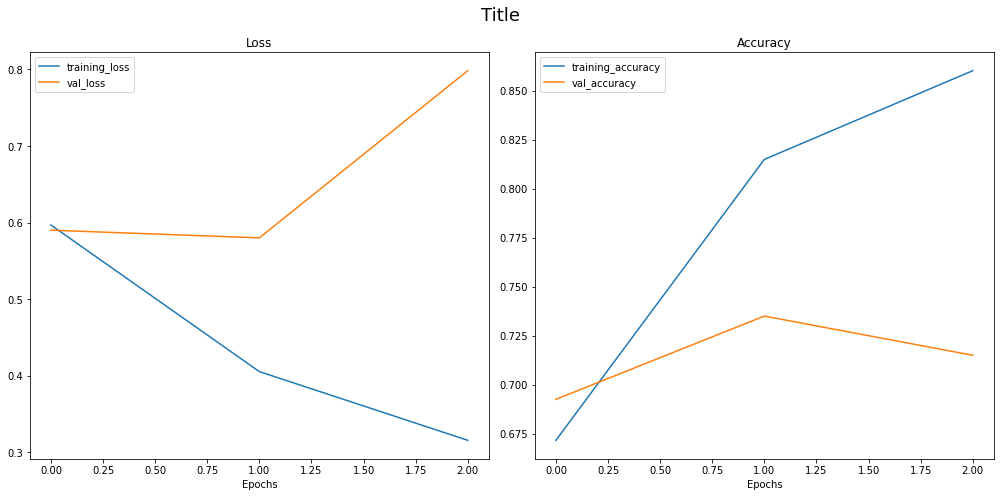

In [5]:
ut.Visualize.plot_loss_curves([history_8],['Title'])

In [4]:
base_model_9 = tf.keras.applications.InceptionV3(include_top= False, weights= 'imagenet', input_shape=INP_SHAPE)
for layer in base_model_9.layers[:-4]:                                                       
    layer.trainable = False
#base_model_9.summary()
model_9 = Sequential()
model_9.add(TimeDistributed(base_model_9, input_shape=(SEQUENCE_LENGTH,299,299,3)))
model_9.add(TimeDistributed(Flatten()))
model_9.add(LSTM (256, activation='tanh', return_sequences=True))
model_9.add(Flatten())
#model_9.add(Dense(128,activation='relu'))
#model_9.add(Dense(64,activation='relu'))
#model_9.add(Dropout(0.1))
model_9.add(Dense(2,activation='softmax'))
model_9.summary()
model_9.compile(loss='categorical_crossentropy', optimizer= optimizers.SGD(lr = 0.01, momentum= 0.5),metrics=['accuracy'])
history_9 = model_9.fit(train_gen,batch_size=8,validation_data=valid_gen,callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',patience=2)],epochs=10,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 20, 8, 8, 2048)   21802784  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 20, 131072)       0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 20, 256)           134480896 
                                                                 
 flatten_1 (Flatten)         (None, 5120)              0         
                                                                 
 dense (Dense)               (None, 2)                 10242     
                                                                 
Total params: 156,293,922
Trainable params: 134,491,138


c:\Users\tdiam\miniconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
400/400 [==============================] - 498s 1s/step - loss: 0.6239 - accuracy: 0.6628 - val_loss: 0.6473 - val_accuracy: 0.6463
Epoch 2/10
400/400 [==============================] - 562s 1s/step - loss: 0.5512 - accuracy: 0.7428 - val_loss: 0.6061 - val_accuracy: 0.7175
Epoch 3/10
400/400 [==============================] - 598s 1s/step - loss: 0.5247 - accuracy: 0.7750 - val_loss: 0.9889 - val_accuracy: 0.6350
Epoch 4/10
400/400 [==============================] - 622s 2s/step - loss: 0.4891 - accuracy: 0.8003 - val_loss: 1.6991 - val_accuracy: 0.5975
Epoch 5/10
400/400 [==============================] - 624s 2s/step - loss: 0.4150 - accuracy: 0.8359 - val_loss: 0.7836 - val_accuracy: 0.7237
Epoch 6/10
180/400 [============>.................] - ETA: 4:30 - loss: 0.4107 - accuracy: 0.8333

In [2]:
def getOpticalFlow(video):
    """Calculate dense optical flow of input video
    Args:
        video: the input video with shape of [frames,height,width,channel]. dtype=np.array
    Returns:
        flows_x: the optical flow at x-axis, with the shape of [frames,height,width,channel]
        flows_y: the optical flow at y-axis, with the shape of [frames,height,width,channel]
    """
    # initialize the list of optical flows
    gray_video = []
    for i in range(len(video)):
        img = cv2.cvtColor(video[i], cv2.COLOR_RGB2GRAY)
        gray_video.append(np.reshape(img,(224,224,1)))

    flows = []
    for i in range(0,len(video)-1):
        # calculate optical flow between each pair of frames
        flow = cv2.calcOpticalFlowFarneback(gray_video[i], gray_video[i+1], None, 0.5, 3, 15, 3, 5, 1.2, cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
        # subtract the mean in order to eliminate the movement of camera
        flow[..., 0] -= np.mean(flow[..., 0])
        flow[..., 1] -= np.mean(flow[..., 1])
        # normalize each component in optical flow
        flow[..., 0] = cv2.normalize(flow[..., 0],None,0,255,cv2.NORM_MINMAX)
        flow[..., 1] = cv2.normalize(flow[..., 1],None,0,255,cv2.NORM_MINMAX)
        # Add into list 
        flows.append(flow)
        
    # Padding the last frame as empty array
    flows.append(np.zeros((224,224,2)))
      
    return np.array(flows, dtype=np.float32)

In [15]:
frame_list = []
path = "C:/Users/tdiam/Desktop/thesis/dataset/RWF-2000 Sequences/activity_data/train/Fight/Video_10"
for frame in os.listdir(path):
    frame_path = os.path.join(path,frame)
    img = cv2.imread(frame_path)
    img = cv2.resize(img,(224,224))
    frame_list.append(img)
frame_list = np.array(frame_list)

In [16]:
flow = getOpticalFlow(frame_list)

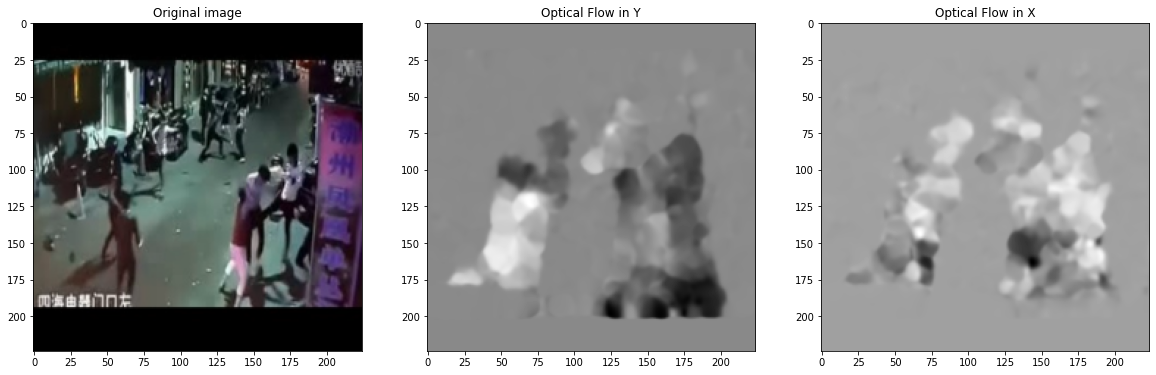

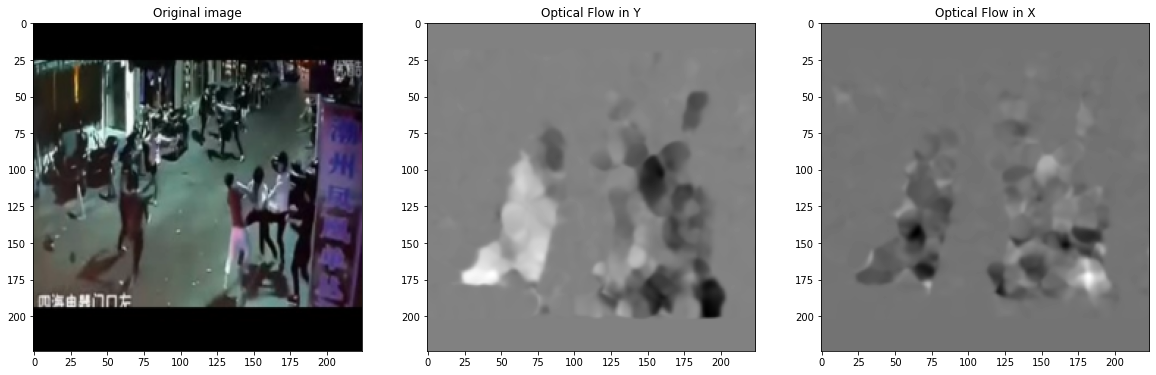

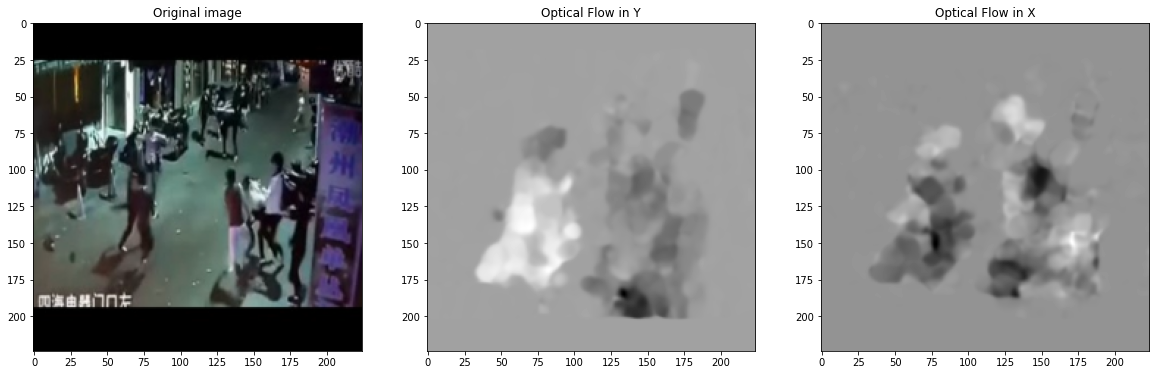

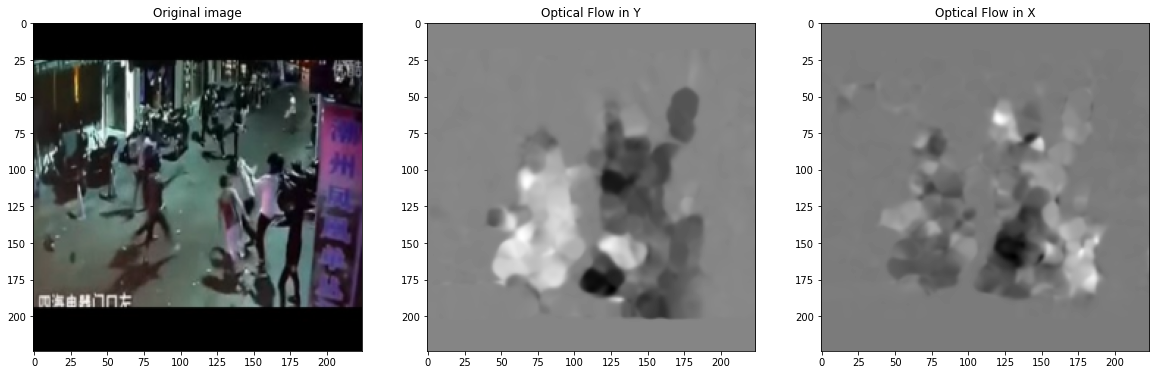

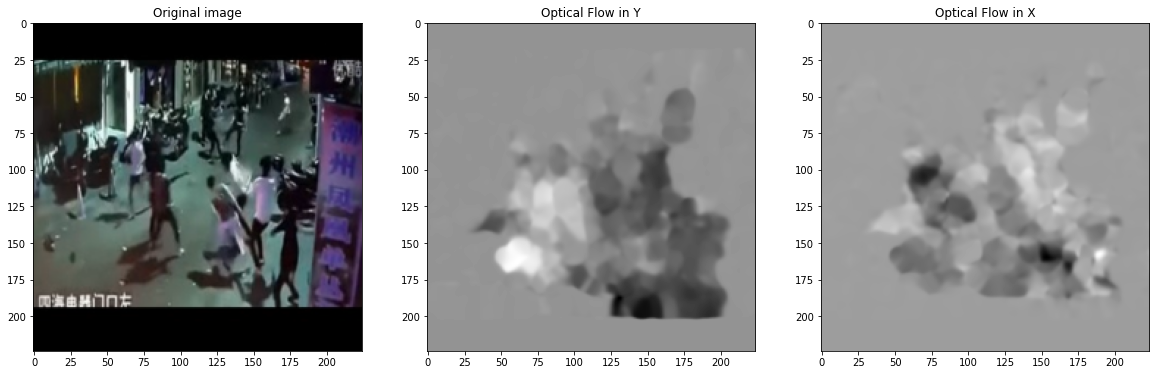

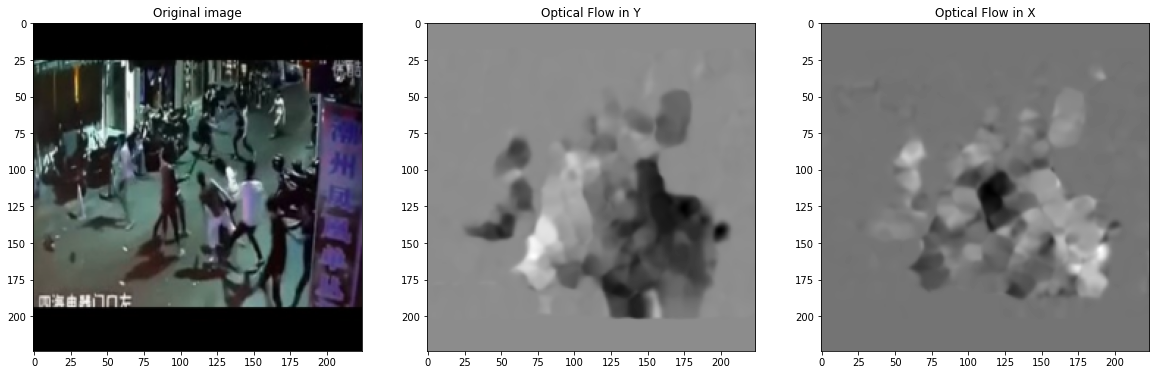

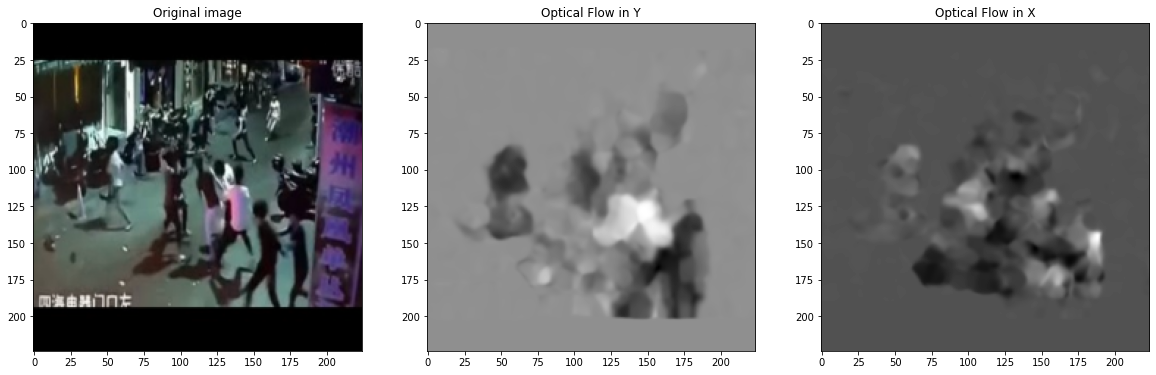

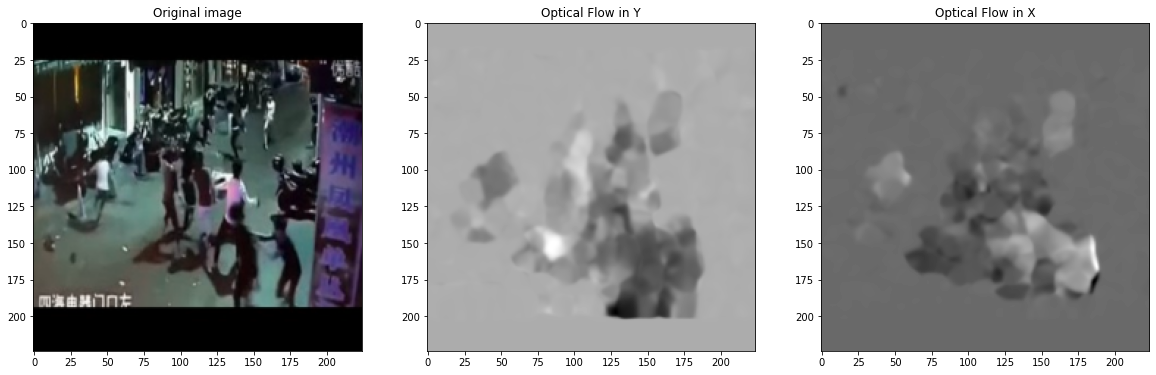

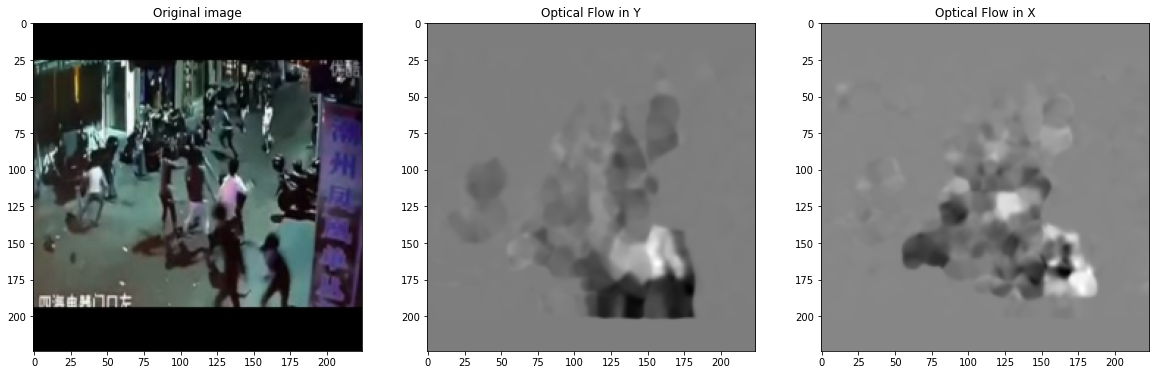

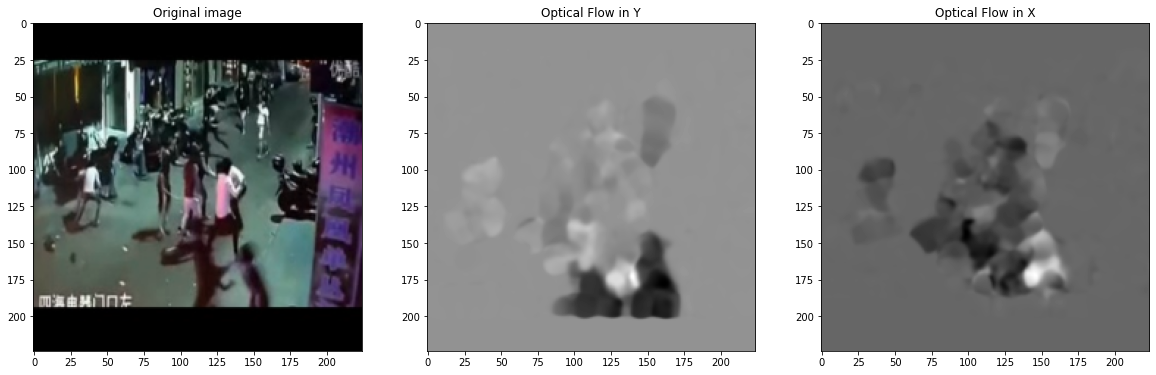

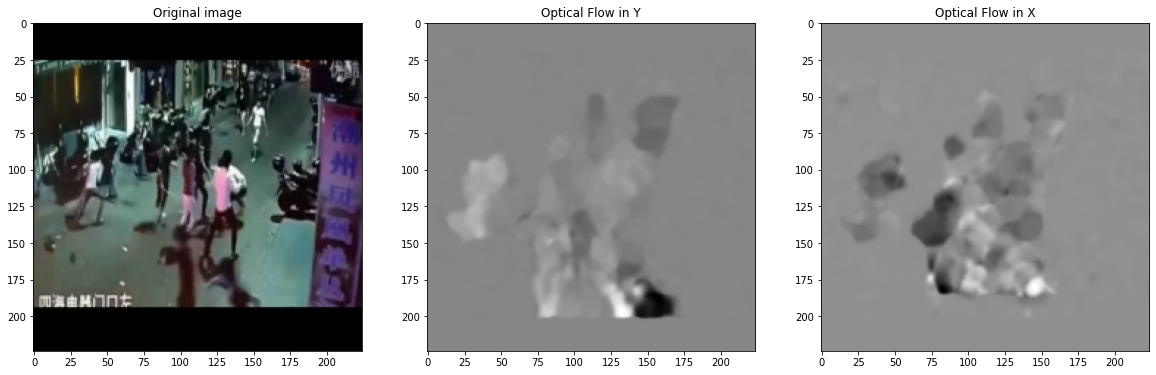

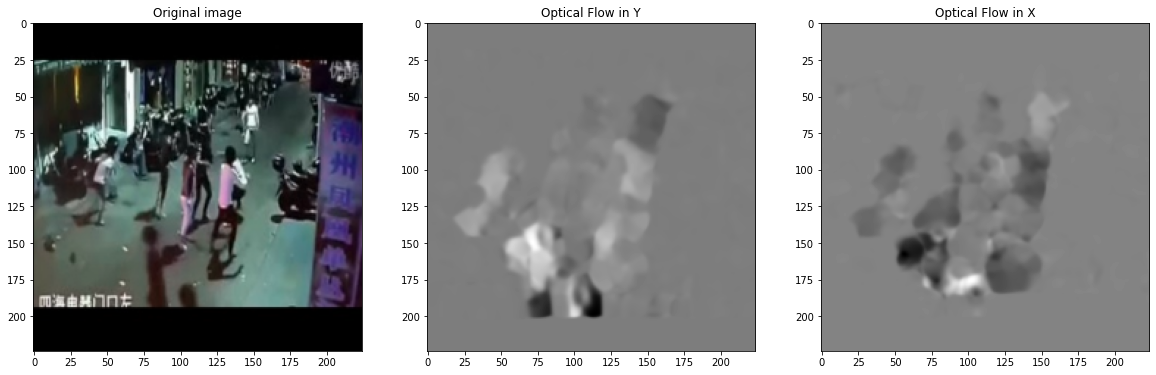

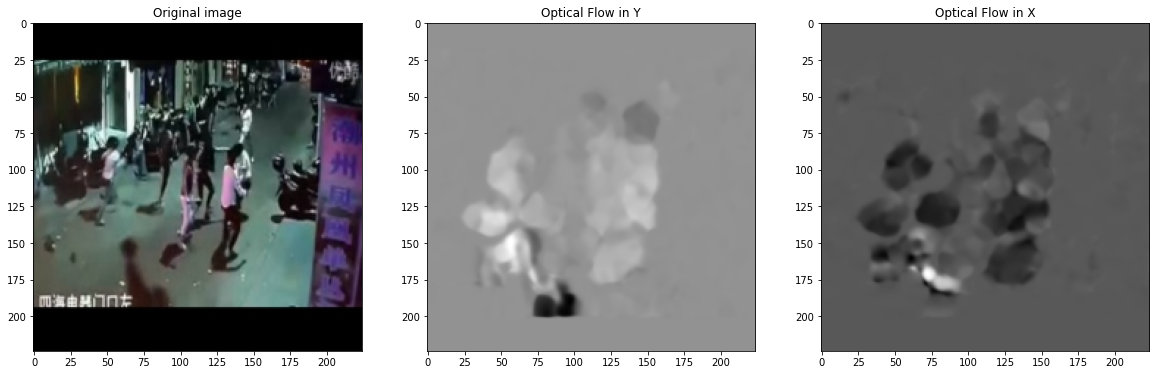

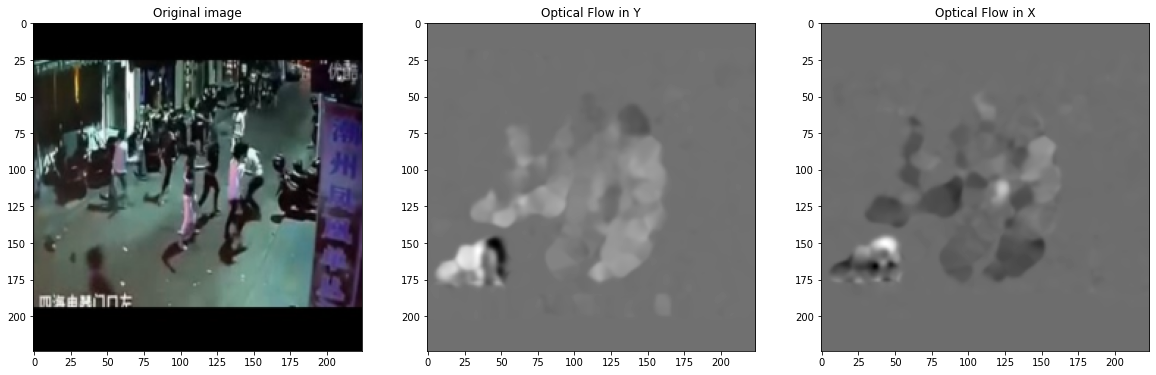

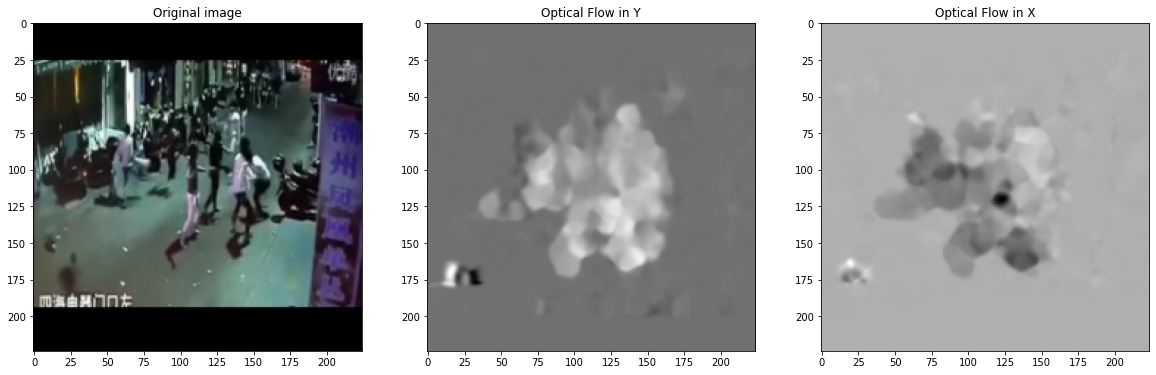

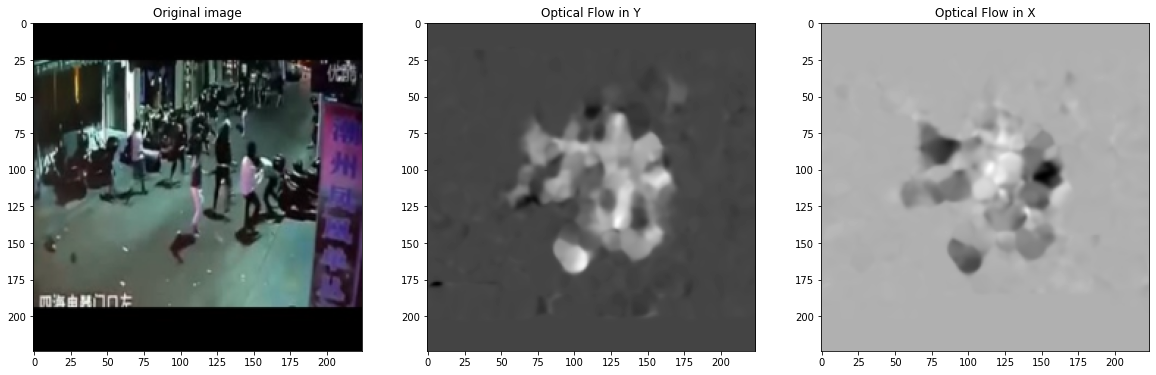

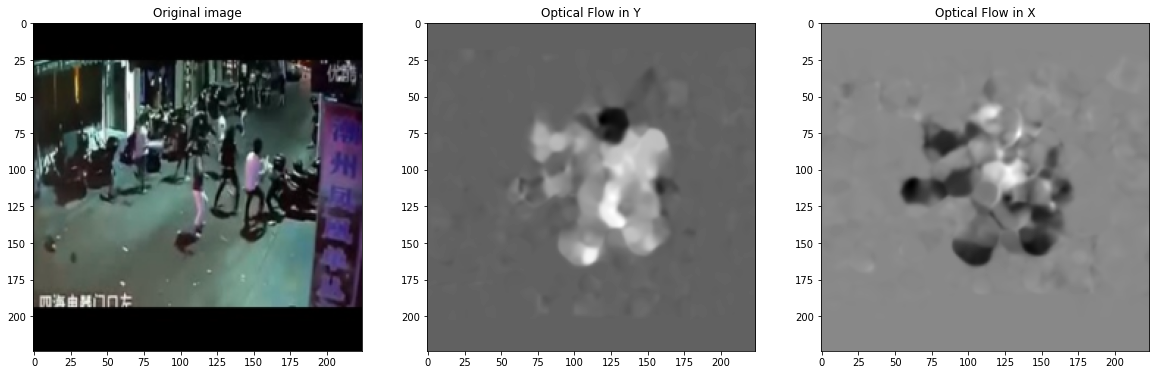

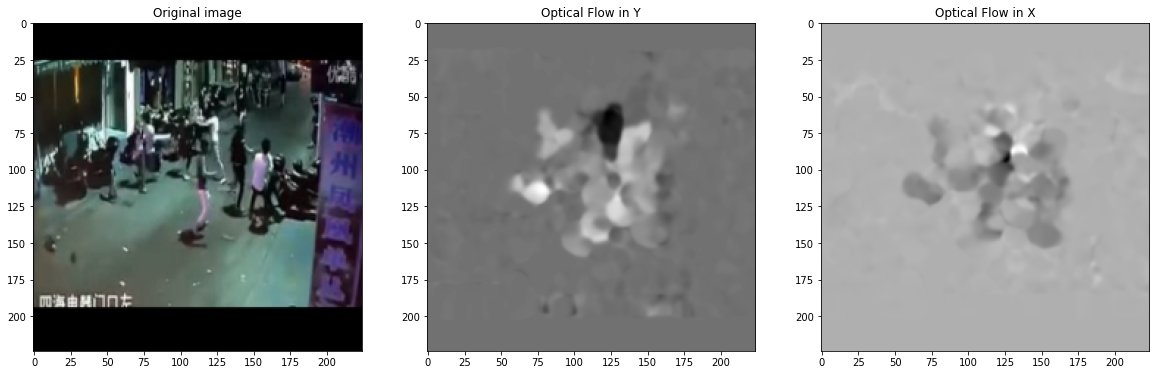

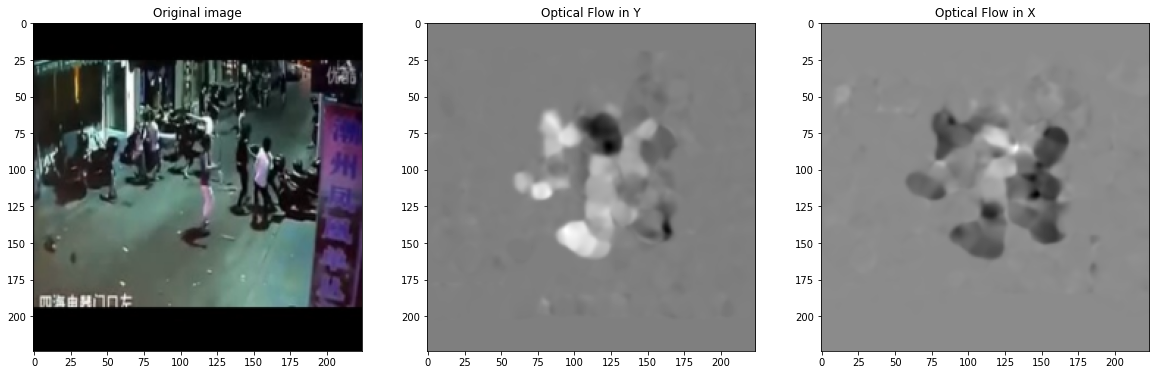

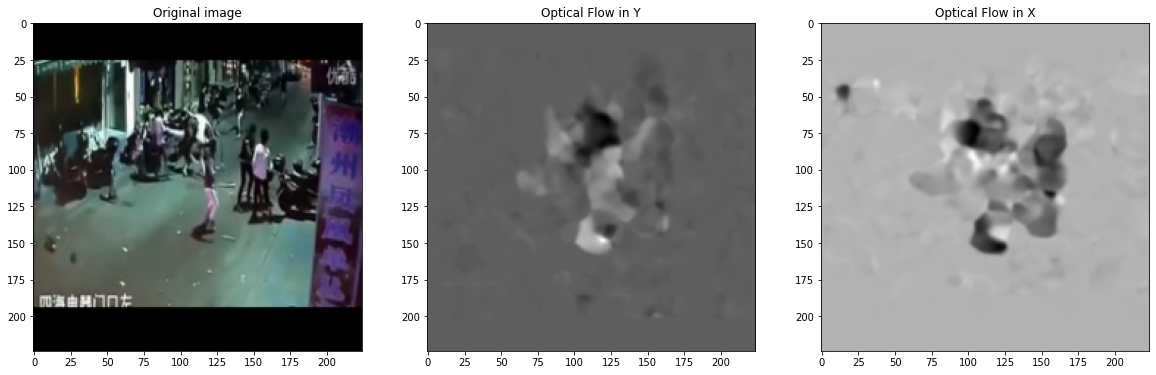

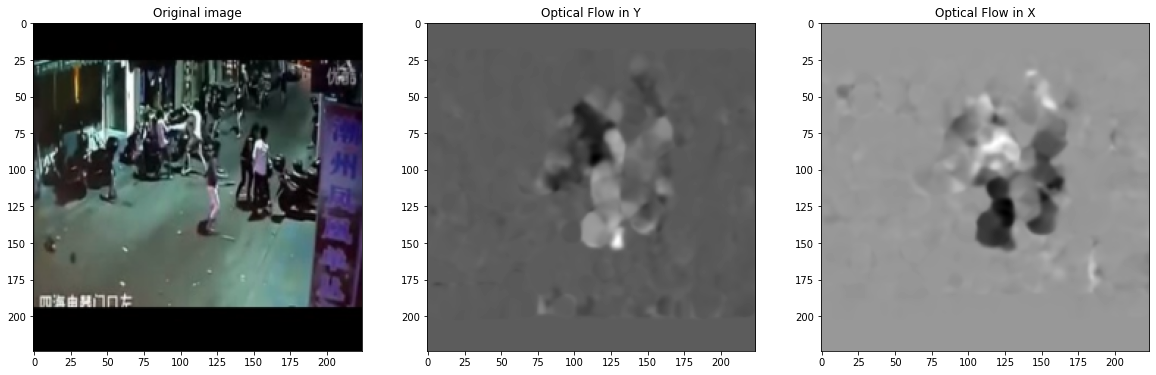

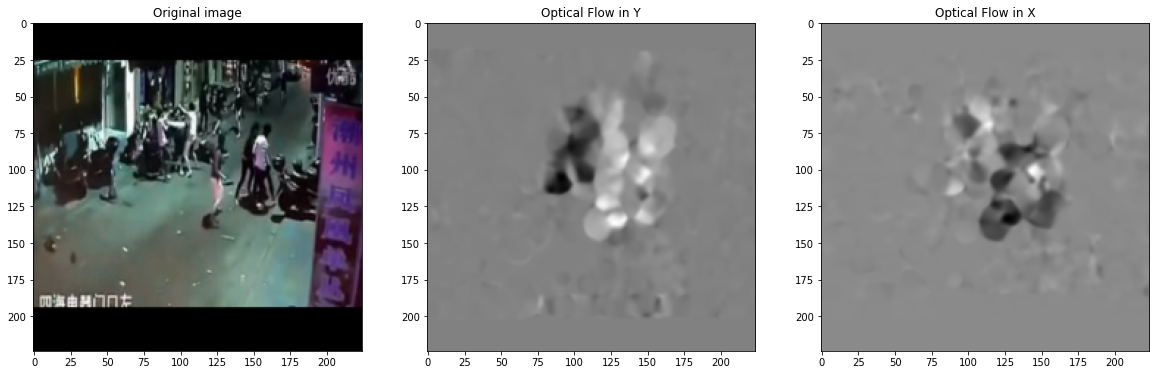

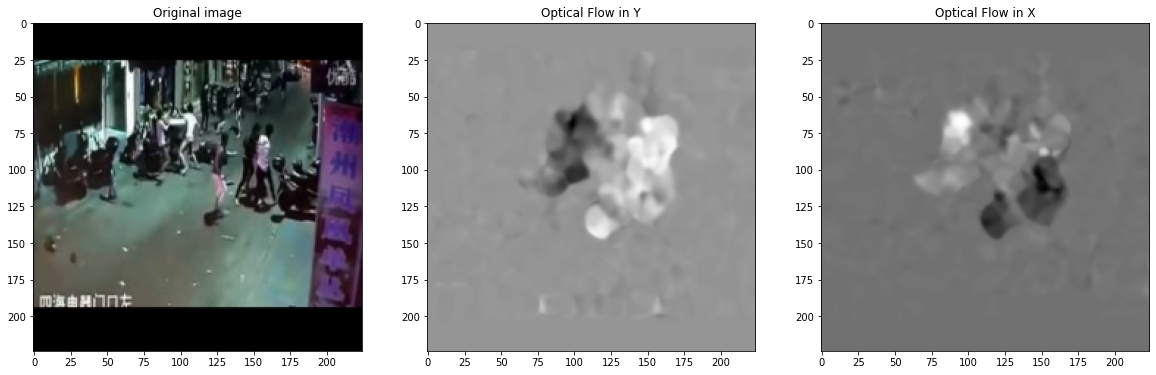

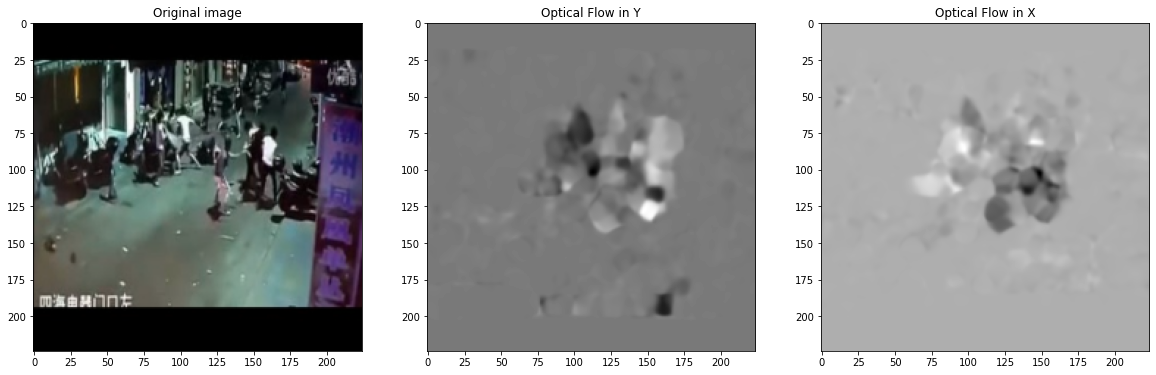

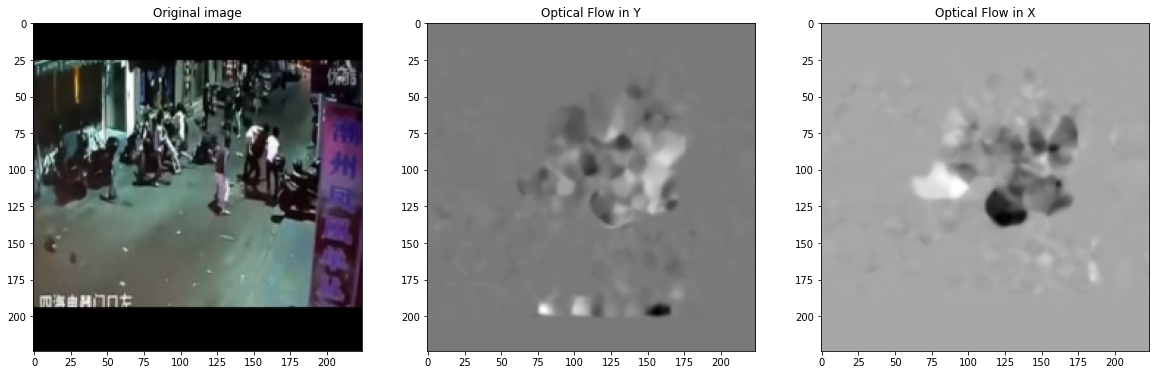

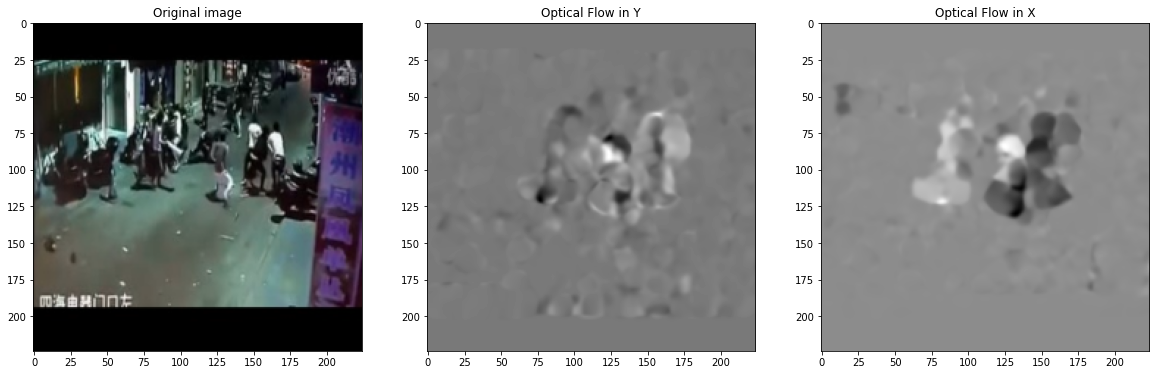

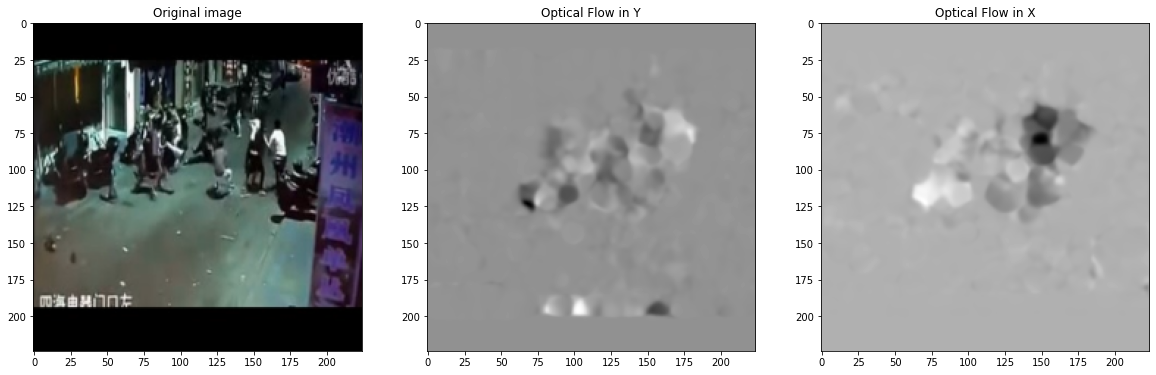

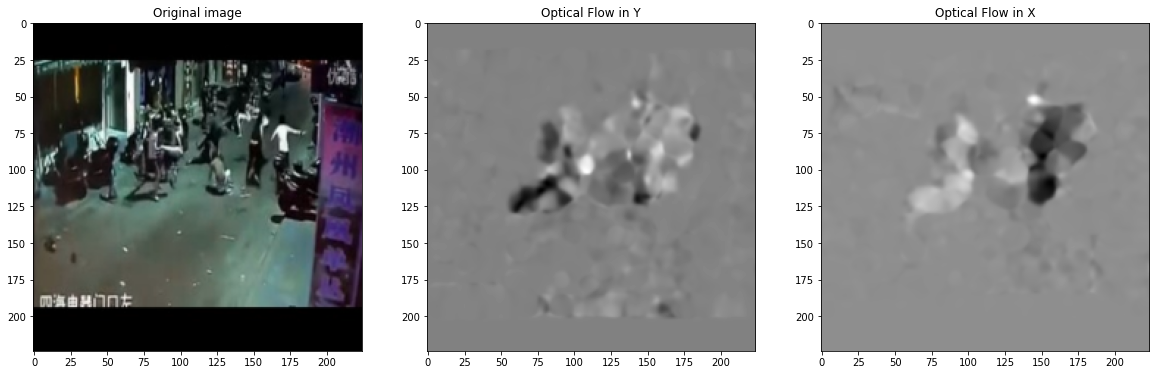

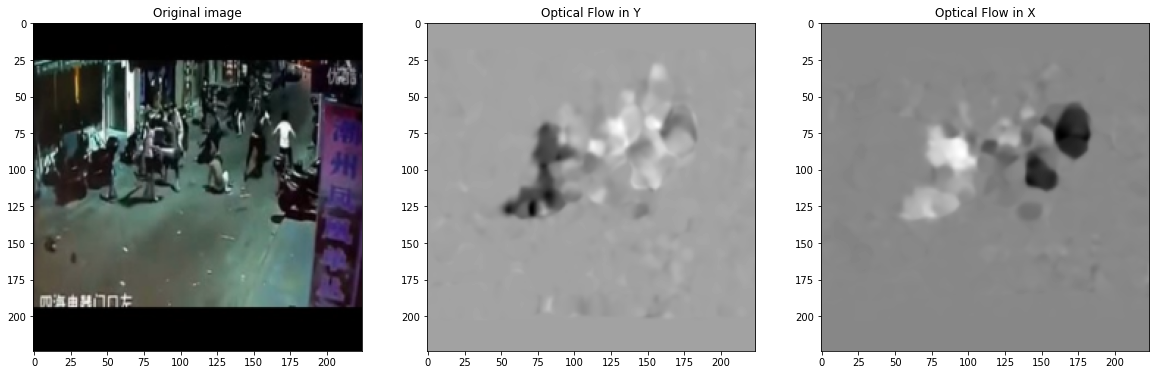

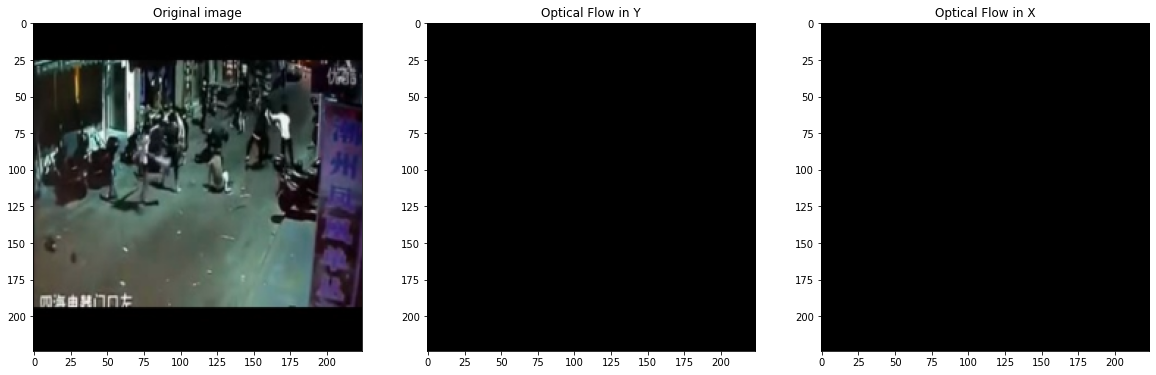

In [17]:
import matplotlib.pyplot as plt
for img,orig_img in zip(flow,frame_list):
    #print(len(img[1][1][0]))
    img_y, img_x = np.split(img,2,axis=2)
    img_y, img_x = np.squeeze(img_y), np.squeeze(img_x)
    plt.figure(figsize=(20,20))

    plt.subplot(1,3,1)
    plt.imshow(orig_img)
    plt.title('Original image')

    plt.subplot(1,3,2)
    plt.imshow(img_y, cmap='gray', vmin=0, vmax=255)
    plt.title('Optical Flow in Y')

    plt.subplot(1,3,3)
    plt.imshow(img_x, cmap='gray', vmin=0, vmax=255)
    plt.title('Optical Flow in X')

    
    plt.show()

